In [1]:
import pandas as pd
import numpy as np

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns



# Using plotly + cufflinks in offline mode
import os
import gc


In [3]:
## Load data
mimic_table = pd.read_csv('MIMICtable_261219.csv')


In [0]:
mimic_table.sedation.head()

In [4]:
mimic_table['inhour'] = np.logical_and(np.logical_and(mimic_table['dayweek'] > 0, mimic_table['dayweek'] < 6) , np.logical_and(mimic_table['timeday'] >= 8, mimic_table['timeday'] <= 17 ))

mimic_table['weekday'] = np.logical_and(mimic_table['dayweek'] > 0, mimic_table['dayweek'] < 6) 



In [5]:
mimic_table['inhour'][:20]


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13     True
14     True
15     True
16     True
17     True
18     True
19     True
Name: inhour, dtype: bool

Text(0.5, 1.0, 'Count distribution of in-hour and out-hour entries')

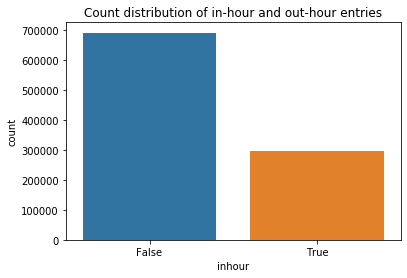

In [6]:
data = mimic_table['inhour']
 
g = sns.countplot(x='inhour', data=mimic_table)
g.set_title('Count distribution of in-hour and out-hour entries')

Text(0.5, 1.0, 'Count distribution of weekday and weekend entries')

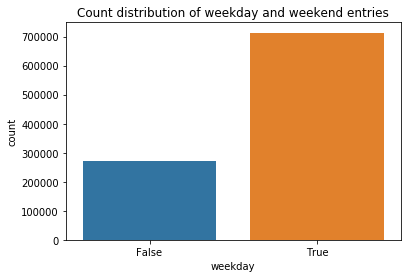

In [57]:
data = mimic_table['weekday']
 
g = sns.countplot(x='weekday', data=mimic_table)
g.set_title('Count distribution of weekday and weekend entries')

Text(0.5, 1.0, 'Count distribution of SIRS score')

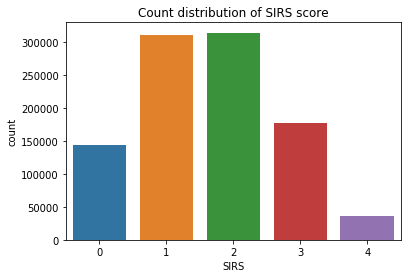

In [59]:
 
g = sns.countplot(x='SIRS', data=mimic_table)
g.set_title('Count distribution of SIRS score')

In [18]:
data = mimic_table[['SIRS','inhour']]
inhour_sirs = data['SIRS'][data.inhour == True]
outhour_sirs = data['SIRS'][data.inhour == False]



Text(0.5, 1.0, 'Count distribution of SIRS score in-hour')

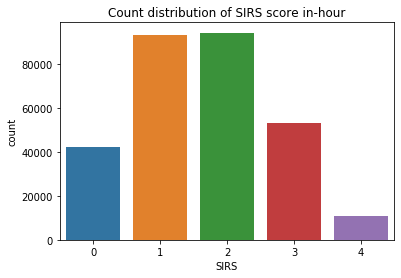

In [60]:
g = sns.countplot(inhour_sirs)
g.set_title('Count distribution of SIRS score in-hour')

Text(0.5, 1.0, 'Count distribution of SIRS score out-hour')

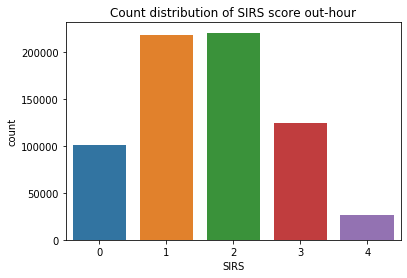

In [61]:
g = sns.countplot(outhour_sirs)
g.set_title('Count distribution of SIRS score out-hour')

In [21]:

data = mimic_table[['SIRS','weekday']]
week_sirs = data['SIRS'][data.weekday == True]
weekend_sirs = data['SIRS'][data.weekday == False]
 


In [51]:
data = mimic_table[['SOFA','inhour']]
inhour_sofa = data['SOFA'][data.inhour == True]
outhour_sofa = data['SOFA'][data.inhour == False]




Text(0.5, 1.0, 'Count distribution of SOFA score')

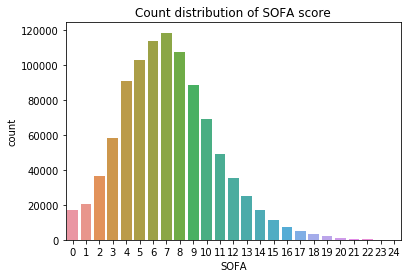

In [62]:
g = sns.countplot(x='SOFA', data=mimic_table)
g.set_title('Count distribution of SOFA score')

Text(0.5, 1.0, 'Count distribution of SOFA score in-hour')

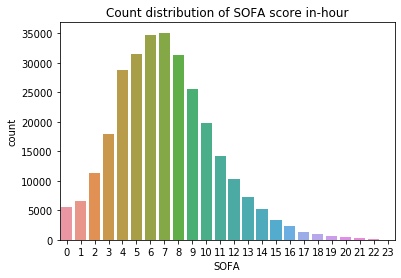

In [63]:
g = sns.countplot(inhour_sofa)
g.set_title('Count distribution of SOFA score in-hour')


Text(0.5, 1.0, 'Count distribution of SOFA score out-hour')

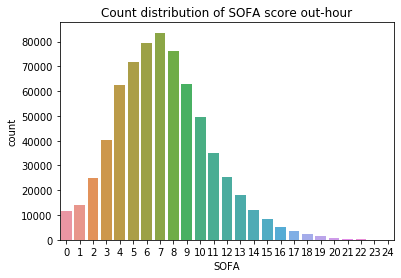

In [64]:
g = sns.countplot(outhour_sofa)
g.set_title('Count distribution of SOFA score out-hour')


In [77]:
## chi-squre test

from scipy.stats import chisquare
count_data = data['SOFA'].value_counts().sort_index()
count_outhour = outhour_sofa.value_counts()
#count_inhour = count_inhour.append(pd.Series(0, index=[24])).sort_index()

print(count_outhour)
print(count_data)
chisquare(count_outhour, f_exp = count_data)

7     83611
6     79488
8     76337
5     71706
9     62955
4     62529
10    49669
3     40478
11    35195
12    25178
2     24917
13    18128
1     13988
14    12130
0     11567
15     8342
16     5328
17     3465
18     2157
19     1374
20      755
21      461
22      178
23       12
24        4
Name: SOFA, dtype: int64
0      17098
1      20574
2      36314
3      58367
4      91277
5     103290
6     114134
7     118724
8     107743
9      88508
10     69511
11     49446
12     35406
13     25342
14     17301
15     11617
16      7605
17      4783
18      3072
19      2042
20      1146
21       685
22       253
23        27
24         4
Name: SOFA, dtype: int64


Power_divergenceResult(statistic=754506.2545853683, pvalue=0.0)

In [ ]:
data = mimic_table[['SIRS','inhour']]
inhour_sirs = data['SIRS'][data.inhour == True]
outhour_sirs = data['SIRS'][data.inhour == False]



[Text(0.5, 0, 'Hour in a day')]

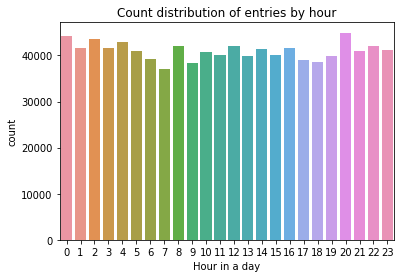

In [69]:
g = sns.countplot(x='timeday', data=mimic_table)
g.set_title('Count distribution of entries by hour')
g.set(xlabel='Hour in a day')

[Text(0.5, 0, 'Day in a week')]

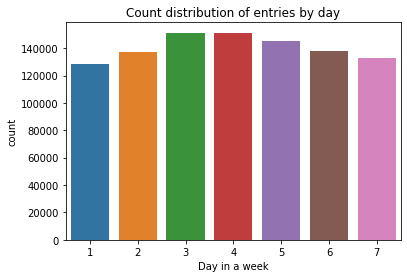

In [70]:
g = sns.countplot(x='dayweek', data=mimic_table)
g.set_title('Count distribution of entries by day')
g.set(xlabel='Day in a week')

In [ ]:
mimic_table['SIRS']

In [9]:
## look at the sirs >= 2 and sofa score >9 
mimic_table['possible_sep_sirs'] = mimic_table['SIRS'] >= 2
mimic_table['possible_sep_sofa'] = mimic_table['SOFA'] >= 9
data = mimic_table[['timeday','inhour','dayweek','possible_sep_sirs','possible_sep_sofa']]


In [10]:
data.head()

,timeday,inhour,dayweek,possible_sep_sirs,possible_sep_sofa
0,19,False,4,True,False
1,20,False,4,True,False
2,21,False,4,True,False
3,22,False,4,True,False
4,23,False,4,True,False


In [11]:
data_pos_sirs = data[data['possible_sep_sirs'] == True]
data_pos_sofa = data[data['possible_sep_sofa'] == True]


[Text(0.5, 0, 'Hour in a day')]

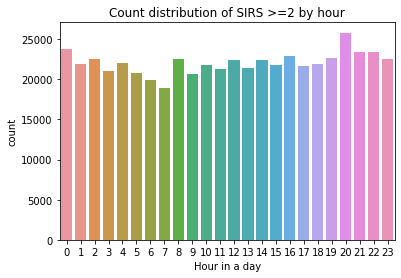

In [27]:
## first hours 

g = sns.countplot(x='timeday', data=data_pos_sirs)
g.set_title('Count distribution of SIRS >=2 by hour')
g.set(xlabel='Hour in a day')

[Text(0.5, 0, 'Hour in a day')]

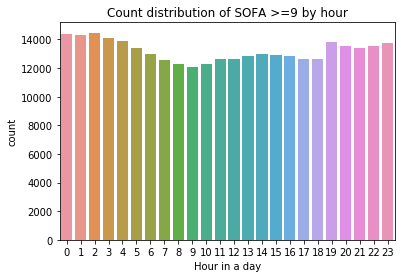

In [28]:
g = sns.countplot(x='timeday', data=data_pos_sofa)
g.set_title('Count distribution of SOFA >=9 by hour')
g.set(xlabel='Hour in a day')

/Users/owenx/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'right middle'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


(0, 23)

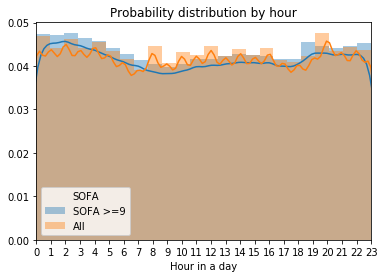

In [50]:

g = sns.distplot(data_pos_sofa['timeday'],hist = True, bins = 24)
g.set_title('Probability distribution by hour')
g = sns.distplot(mimic_table['timeday'],hist = True, bins = 24)

g.set(xlabel='Hour in a day')
g.set_xticks(range(0,24,1))
plt.legend(title='SOFA', loc='right middle', labels=['SOFA >=9', 'All'])

plt.xlim(0,23)


[Text(0.5, 0, 'Hour in a day')]

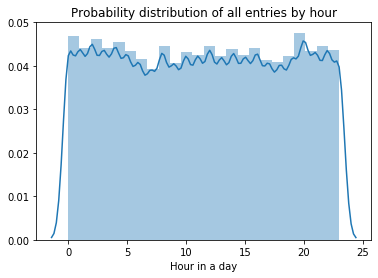

In [45]:
g = sns.distplot(mimic_table['timeday'],hist = True, bins = 24)
g.set_title('Probability distribution of all entries by hour')
g.set(xlabel='Hour in a day')

Text(0.5, 1.0, 'Count of SIRS >=2 and SOFA >=9 long a day')

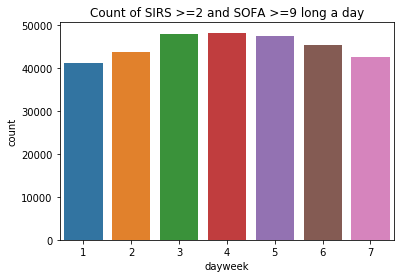

In [78]:
g = sns.countplot(x='dayweek', data=data_pos_sofa)
g.set_title('Count of SIRS >=2 and SOFA >=9 long a day')


In [50]:
mimic_table.info

<bound method DataFrame.info of         bloc  icustayid   charttime  timeday  dayweek  gender           age  \
0          1          3  7245486000       19        4       0  17639.826435   
1          2          3  7245489600       20        4       0  17639.826435   
2          3          3  7245493200       21        4       0  17639.826435   
3          4          3  7245496800       22        4       0  17639.826435   
4          5          3  7245500400       23        4       0  17639.826435   
...      ...        ...         ...      ...      ...     ...           ...   
984264    43      99995  4612942800       13        6       0   8538.739340   
984265    44      99995  4612946400       14        6       0   8538.739340   
984266    45      99995  4612950000       15        6       0   8538.739340   
984267    46      99995  4612953600       16        6       0   8538.739340   
984268    60      99995  4613004000        6        7       0   8538.739340   

        elixhauser 

In [33]:
died.head(100)

,index,icustayid,died_in_hosp
0,0,3,0
1,1,11,0
2,2,12,0
3,3,14,0
4,4,30,0
...,...,...,...
95,95,385,1
96,96,391,0
97,97,398,0
98,98,399,0


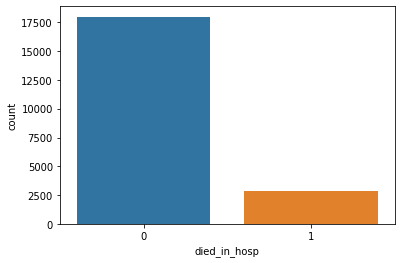

In [34]:
## how many died in hospital and how many not 
g = sns.countplot(x='died_in_hosp', data=died)


In [8]:
 data = (mimic_table['inhour'] == True)
 

In [23]:
data = mimic_table['inhour'][mimic_table['died_in_hosp'] == 1 ]
data.set_column

169       True
170       True
171       True
172       True
173       True
          ... 
983044    True
983045    True
983046    True
983047    True
983048    True
Name: inhour, Length: 154199, dtype: bool

In [78]:
mimic_table['id_diff'] = mimic_table['icustayid'].diff()
mimic_table['sirs_diff'] = mimic_table['SIRS'].diff()  
mimic_table['sirs_diff'][mimic_table['id_diff'] == 1] = 0

/Users/owenx/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [79]:
mimic_table['sofa_diff'] = mimic_table['SOFA'].diff()  
mimic_table['sofa_diff'][mimic_table['id_diff'] == 1] = 0

/Users/owenx/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[Text(0.5, 0, 'Hour in a day')]

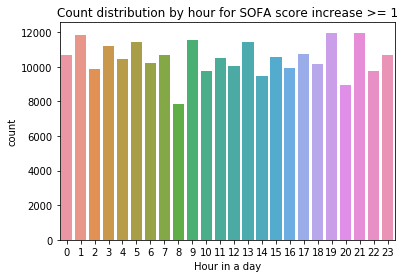

In [93]:
data = mimic_table['timeday'][mimic_table['sofa_diff'] > 0]
g = sns.countplot(data)
g.set_title('Count distribution by hour for SOFA score increase >= 1')
g.set(xlabel = 'Hour in a day')

192       16
224        0
328       17
489       20
607        8
          ..
983699    11
983912    19
983991     0
984070     1
984107    17
Name: timeday, Length: 12679, dtype: int64

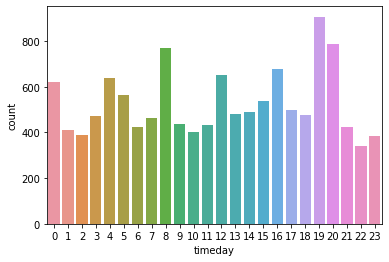

In [88]:
data = mimic_table['timeday'][mimic_table['sirs_diff'] > 1]
g = sns.countplot(data)
data

4802       True
8930       True
9367       True
10861      True
11141      True
          ...  
979000     True
979396    False
979679     True
981677    False
983953     True
Name: weekday, Length: 358, dtype: bool

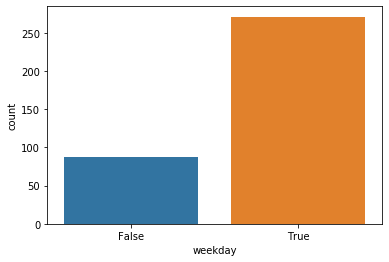

In [68]:
data = mimic_table['weekday'][mimic_table['sofa_diff'] < -10]
g = sns.countplot(data)
data

In [22]:
mimic_table['inhour'].head()

0     True
1     True
2     True
3     True
4     True
      ... 
95    True
96    True
97    True
98    True
99    True
Name: inhour, Length: 100, dtype: bool